# Example of applying processing to seismic trace

In [1]:
import tools
import plot_process

## Creating responses and removing it for mseed files

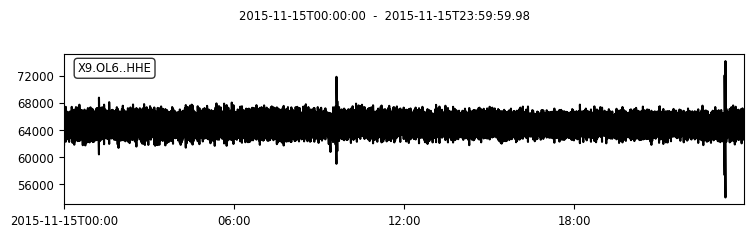

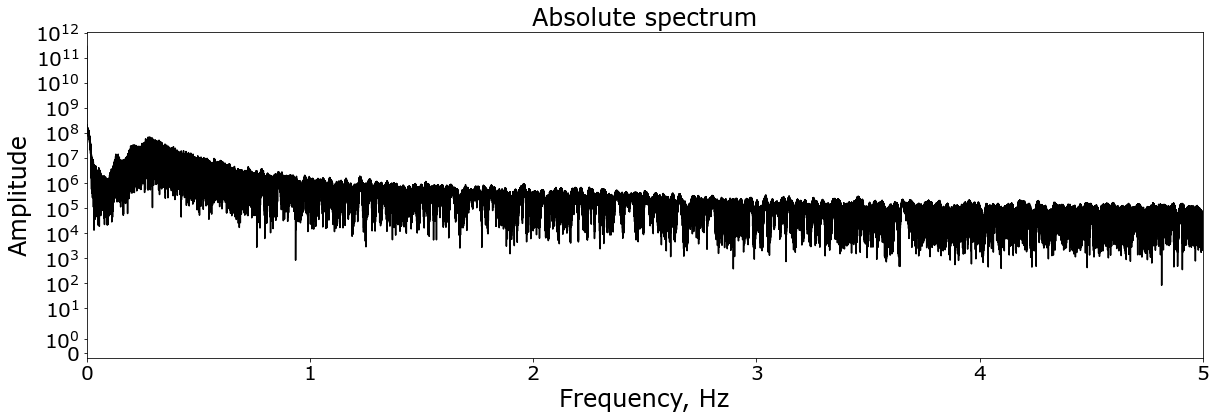

In [2]:
path = r'' #path to files

from obspy import read_inventory
from obspy import read

inv = read_inventory(path+'name.xml')
trace = read(path+'name.mseed')
trace.plot()
plot_process.plot_spectrum(trace.data, 1/trace.stats.sampling_rate)
t = trace.times()
dt = 1/trace.stats.sampling_rate

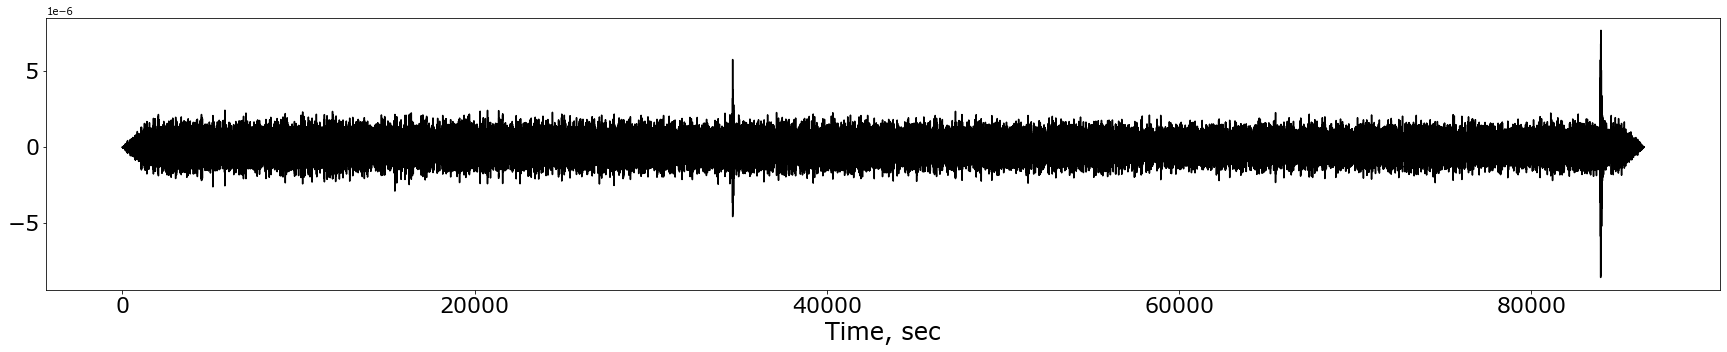

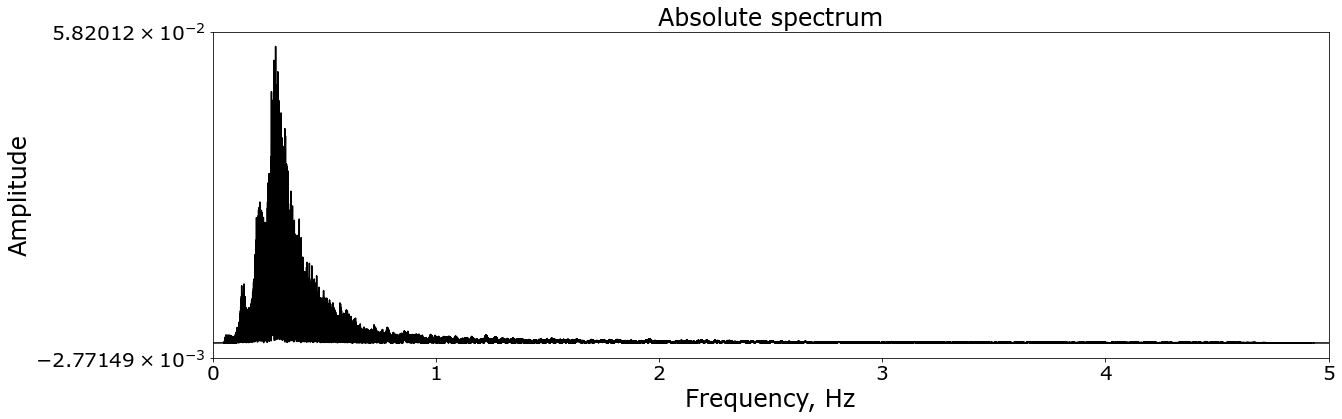

In [3]:
prefilt = [1/20, 1/15, 4.5, 5]
freqmin = 1/15
freqmax = 4

freq_resp, freq = tools.creat_invert_resp(trace, inv)
trace_removed_response = tools.remove_response(trace, freq_resp, freq, prefilt)
plot_process.plot_trace(trace_removed_response, t)
plot_process.plot_spectrum(trace_removed_response, dt)

## Detrending, demeaning, filtering, tapering

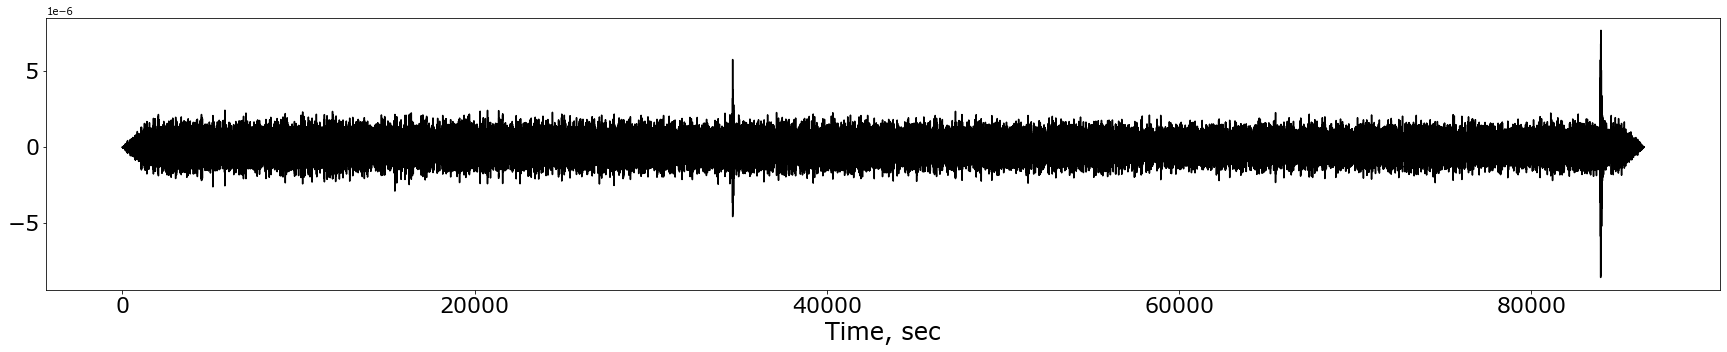

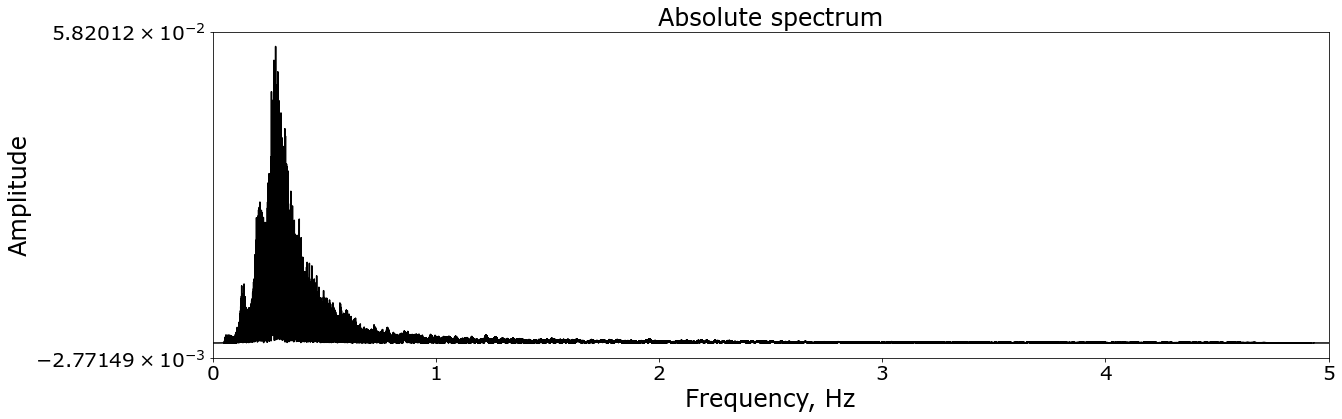

In [4]:
trace_demeaned = tools.demean(trace_removed_response)

plot_process.plot_trace(trace_demeaned, t)
plot_process.plot_spectrum(trace_demeaned, dt)

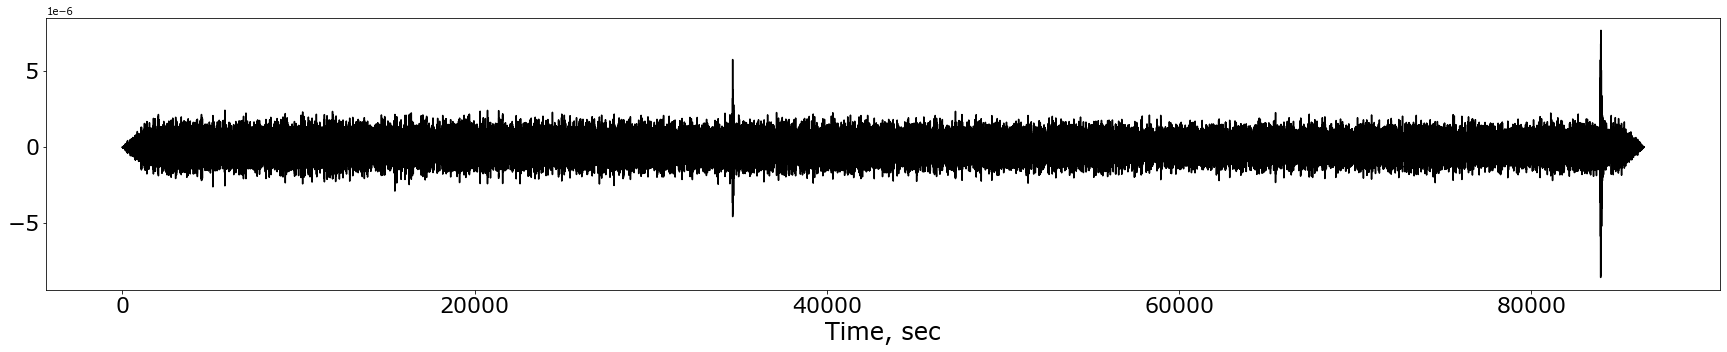

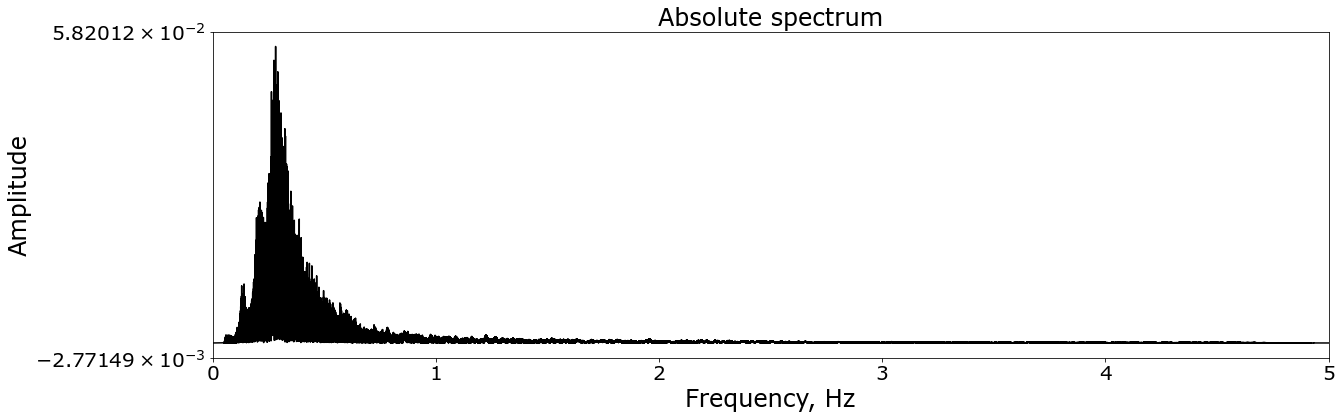

In [5]:
trace_detrend = tools.detrend(trace_demeaned)

plot_process.plot_trace(trace_detrend, t)
plot_process.plot_spectrum(trace_detrend, dt)

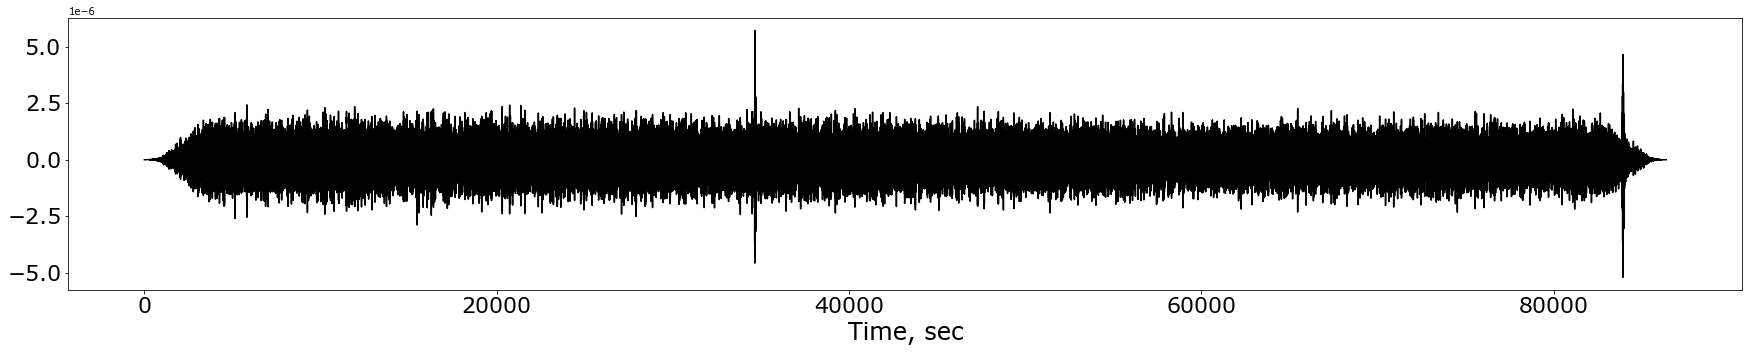

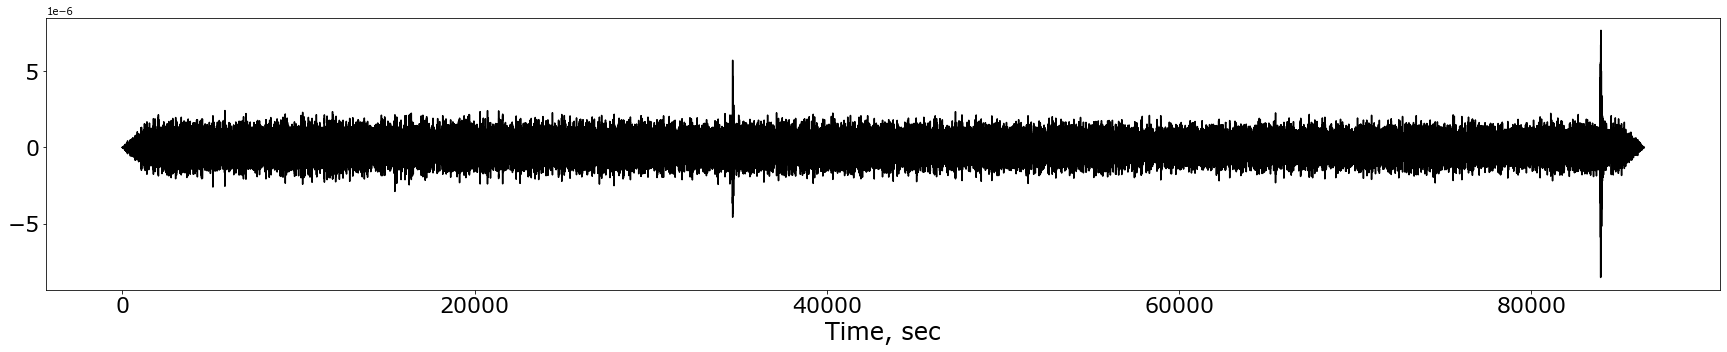

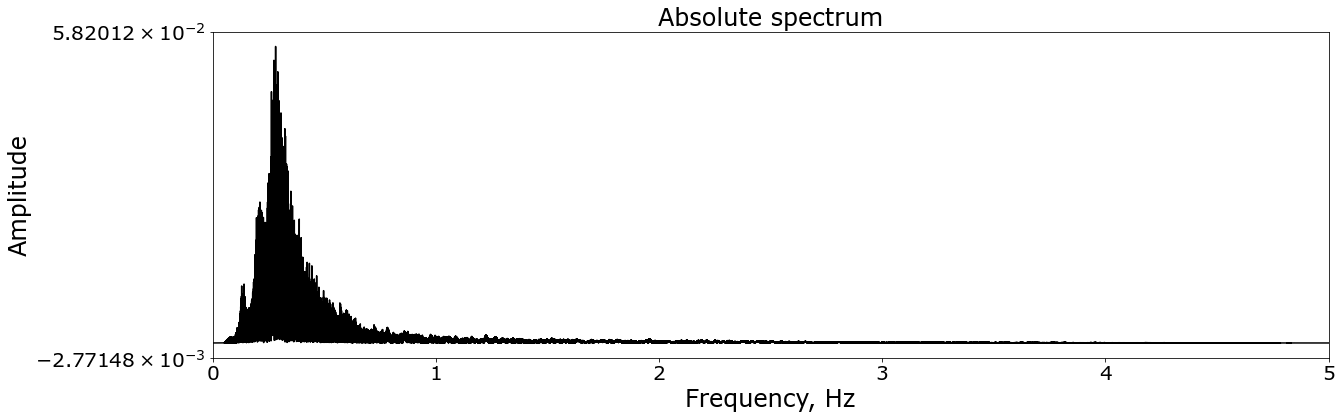

In [6]:
trace_filt = tools.bandpass_filter(trace_detrend, freqmin, freqmax, 4, dt)
trace_tapered = tools.cosine_taper(len(trace_filt))*trace_filt
plot_process.plot_trace(trace_tapered, t)
plot_process.plot_trace(trace_filt, t)
plot_process.plot_spectrum(trace_filt, dt)

## Normalization: time and frequency domain

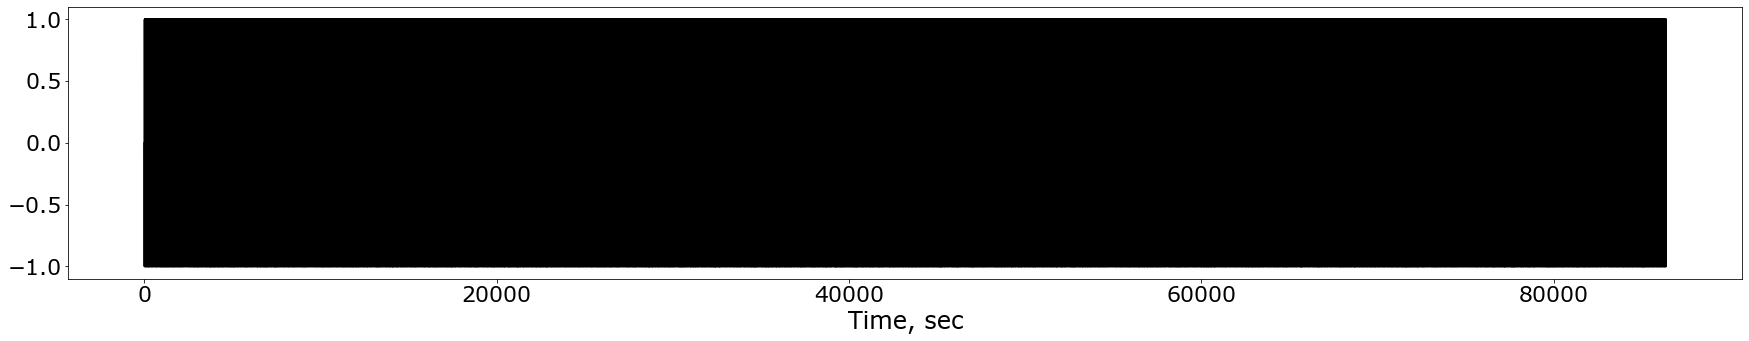

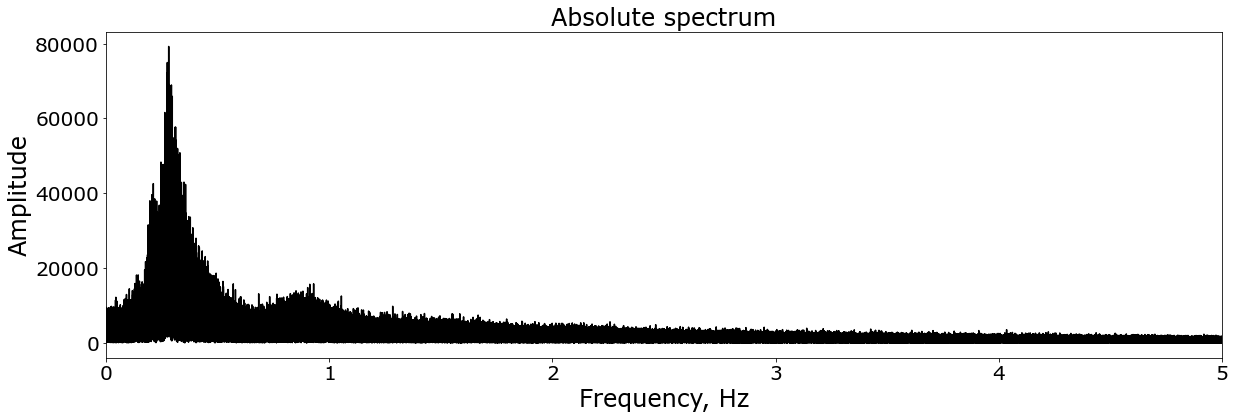

In [8]:
trace_one_bit = tools.one_bit(trace_tapered)
plot_process.plot_trace(trace_one_bit, t)
plot_process.plot_spectrum(trace_one_bit, dt, yscale = False)

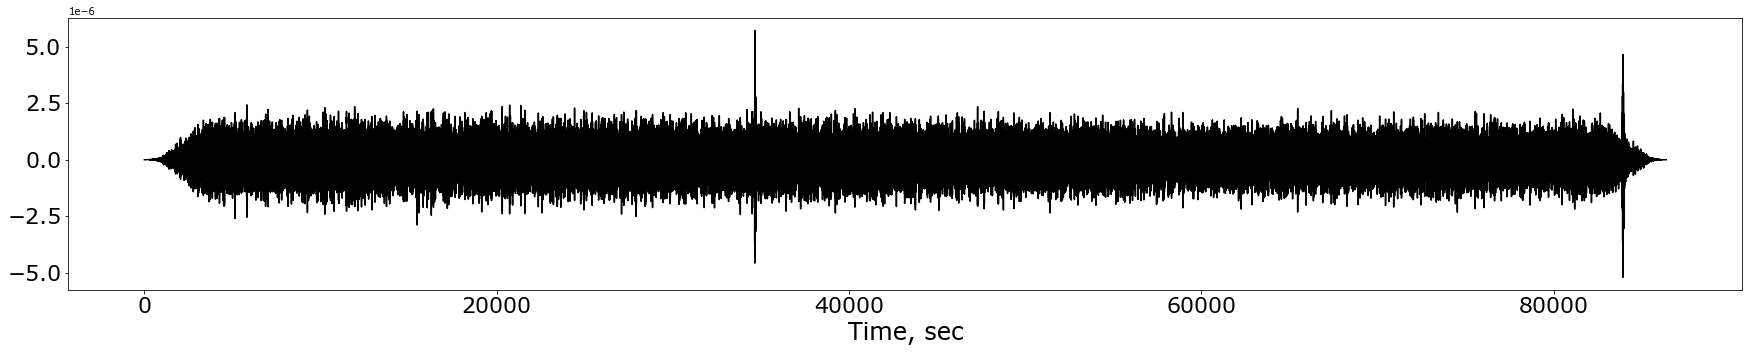

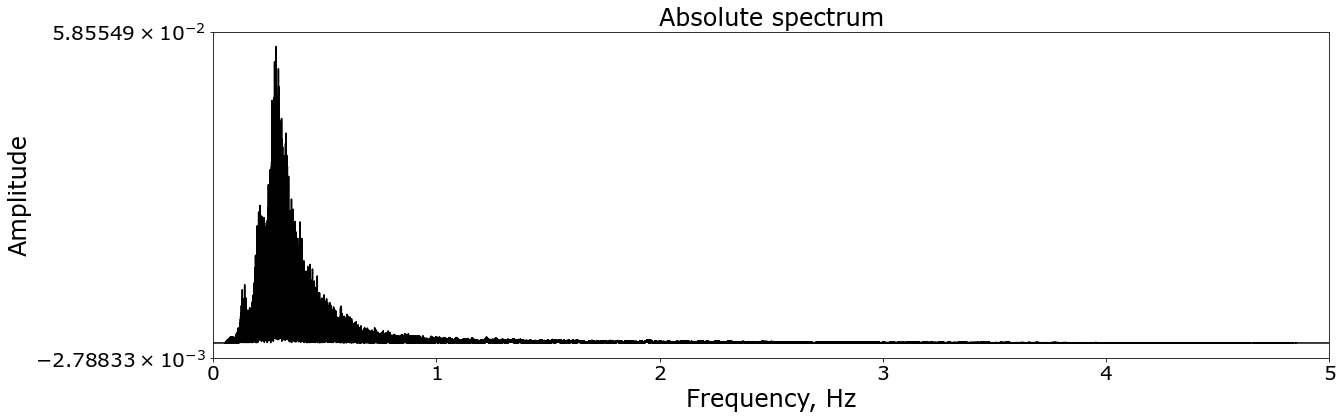

In [9]:
trace_clip = tools.clip(trace_tapered, lim = 3)
plot_process.plot_trace(trace_clip, t)
plot_process.plot_spectrum(trace_clip, dt)

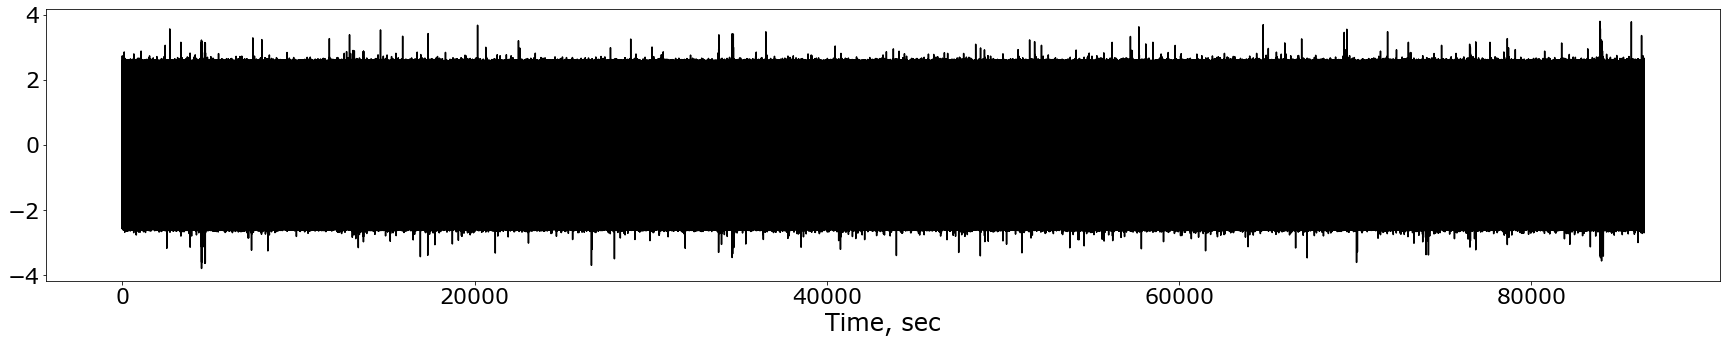

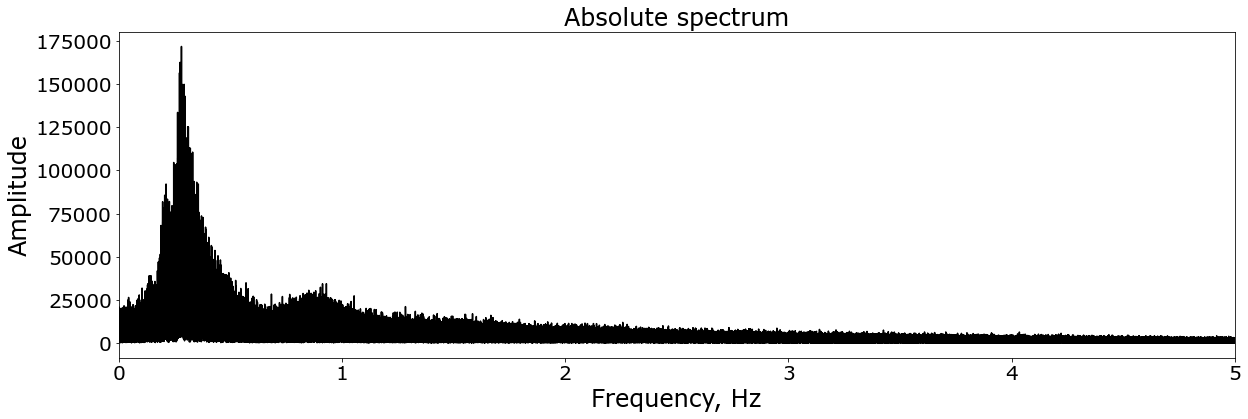

In [10]:
trace_ram = tools.ram(trace_tapered, dt, lwin = 1/freqmax/2)
plot_process.plot_trace(trace_ram, t)
plot_process.plot_spectrum(trace_ram, dt, yscale = False)

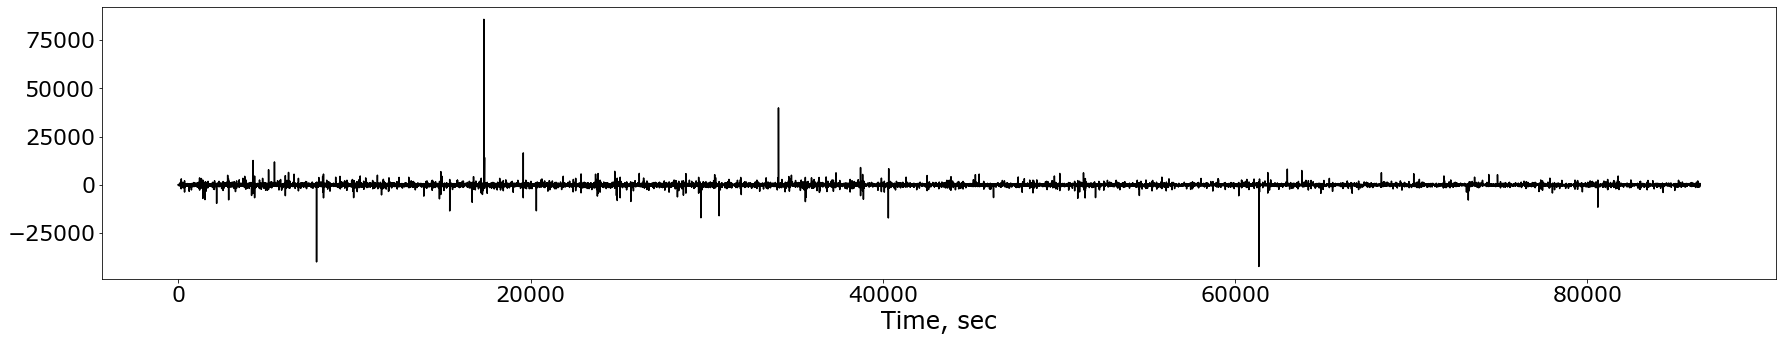

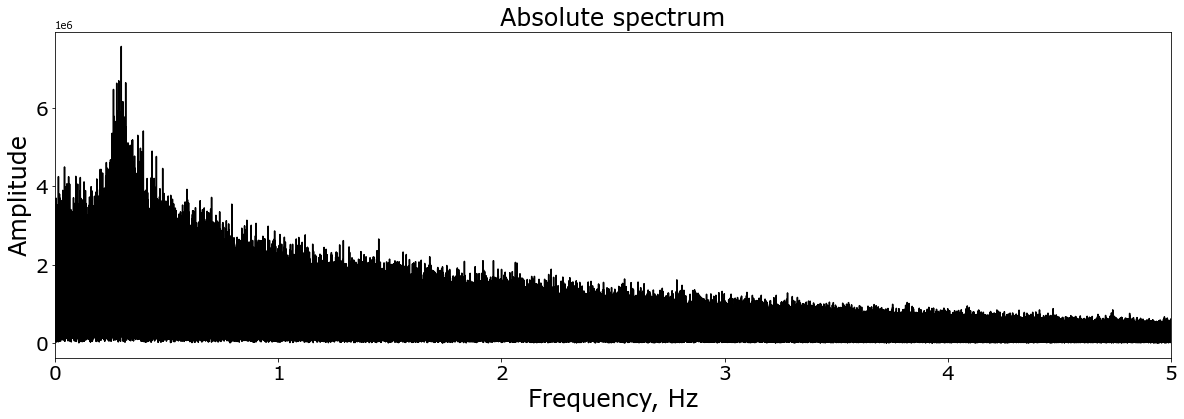

In [11]:
trace_ram_adopt = tools.ram_adoptive(trace_tapered, freq_min = 1/15, freq_max = 1/5, dt = dt, corners = 4, lwin = 1/freqmax/2)
plot_process.plot_trace(trace_ram_adopt, t)
plot_process.plot_spectrum(trace_ram_adopt, dt, yscale = False, xlim = (0, 5))

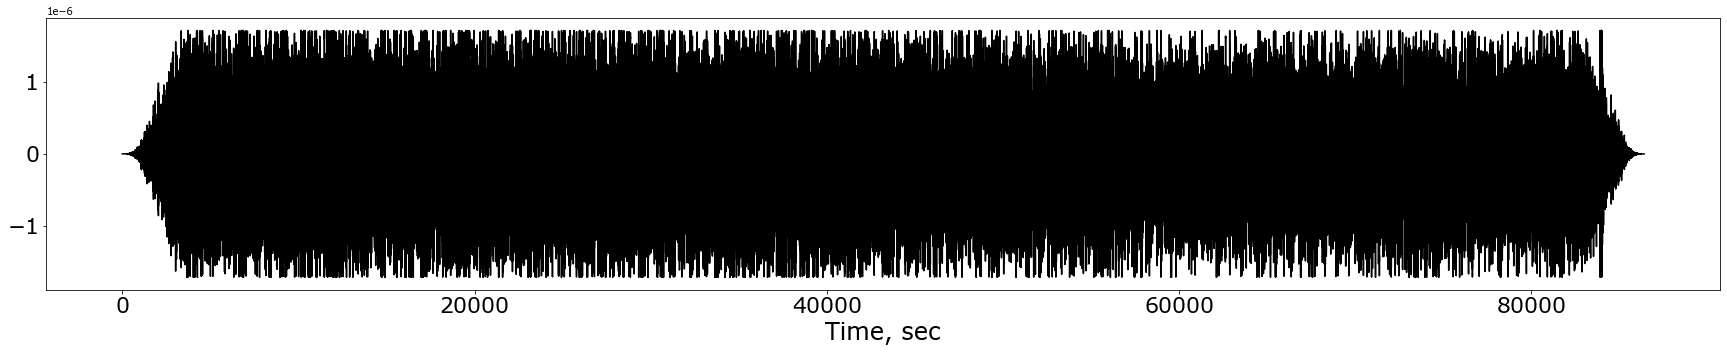

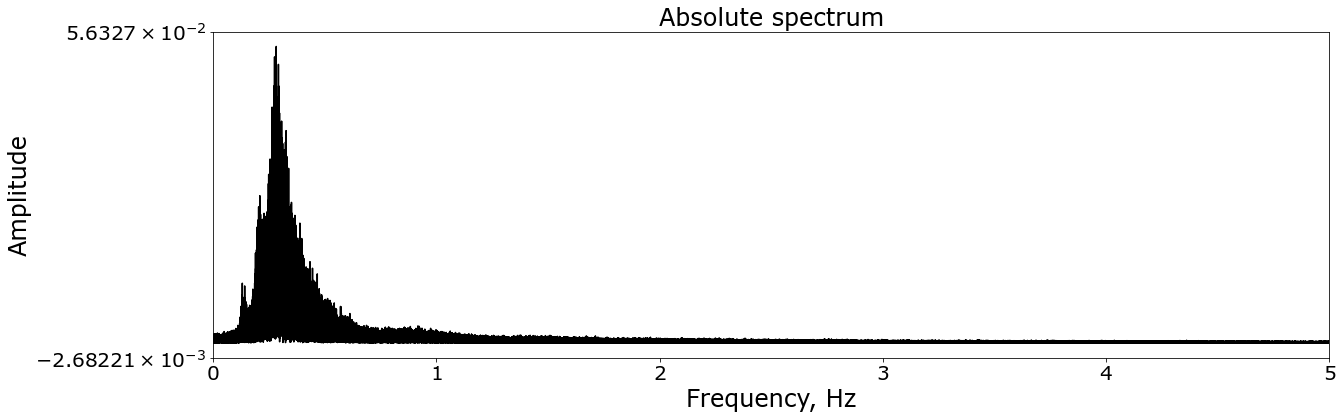

In [12]:
trace_reject = tools.reject(trace_tapered, lim = 3)
plot_process.plot_trace(trace_reject, t)
plot_process.plot_spectrum(trace_reject, dt)

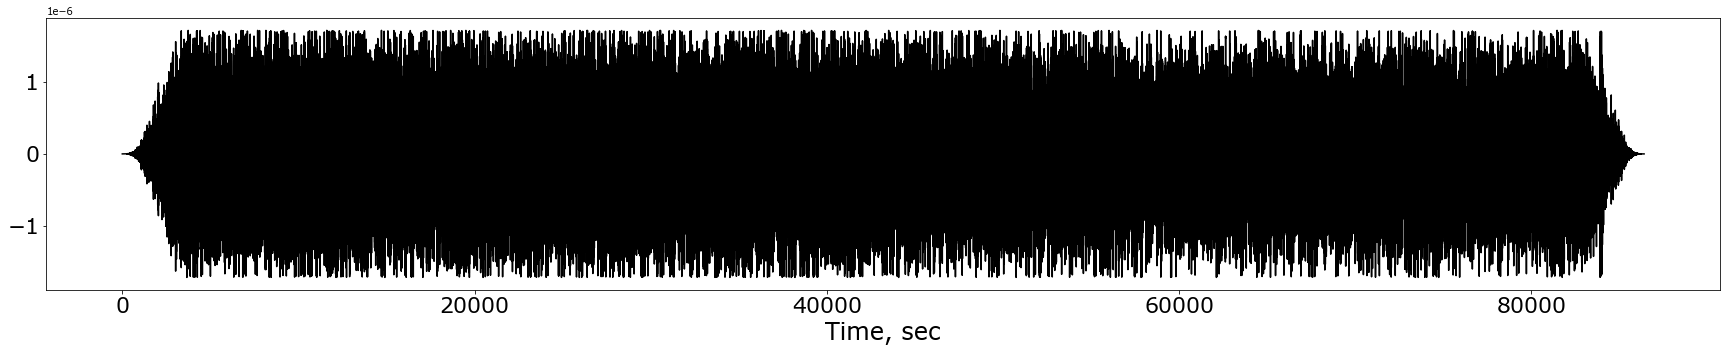

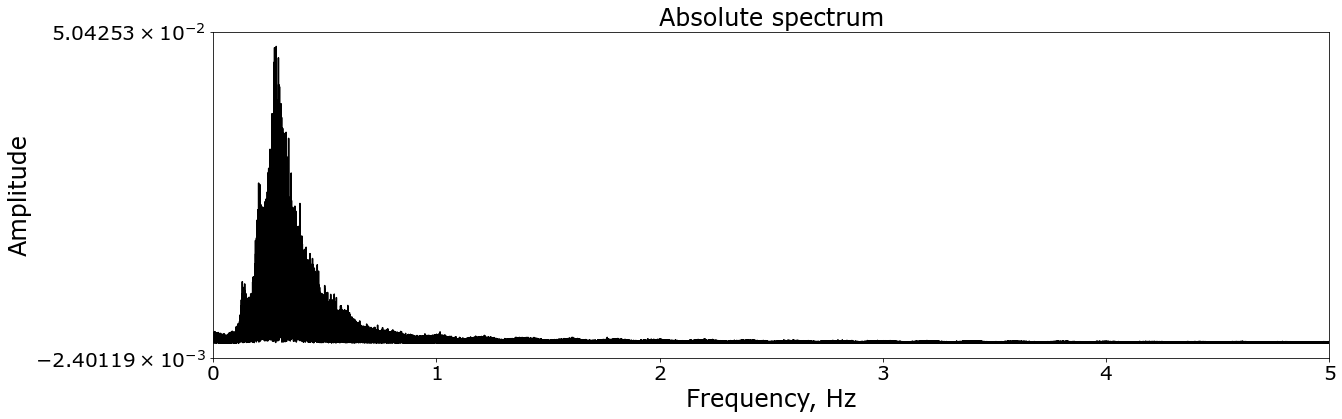

In [13]:
trace_reject_after = tools.reject_after(trace_tapered, lim = 3, number = 5, dt = dt)
plot_process.plot_trace(trace_reject_after, t)
plot_process.plot_spectrum(trace_reject_after, dt)

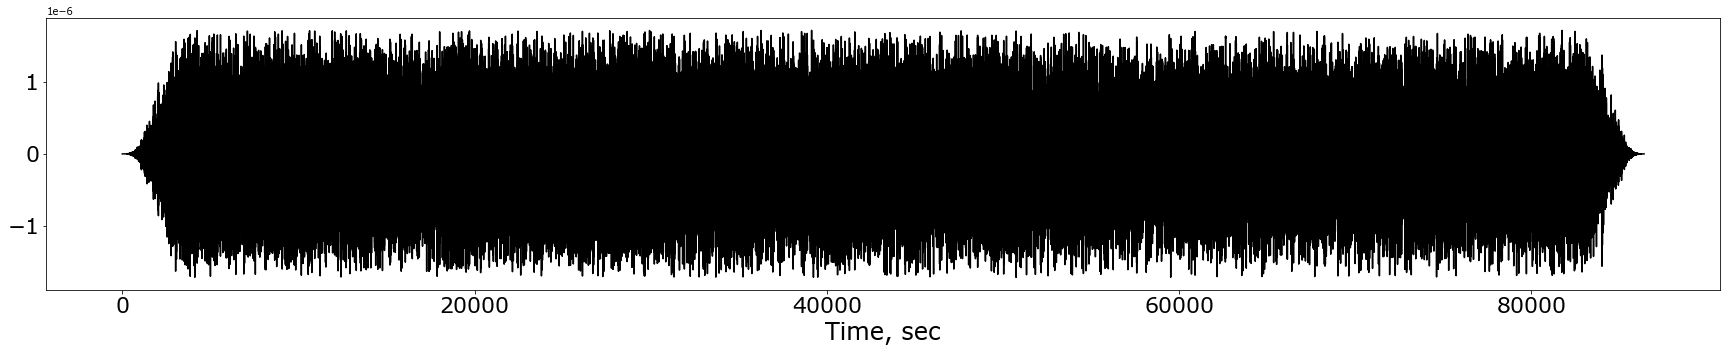

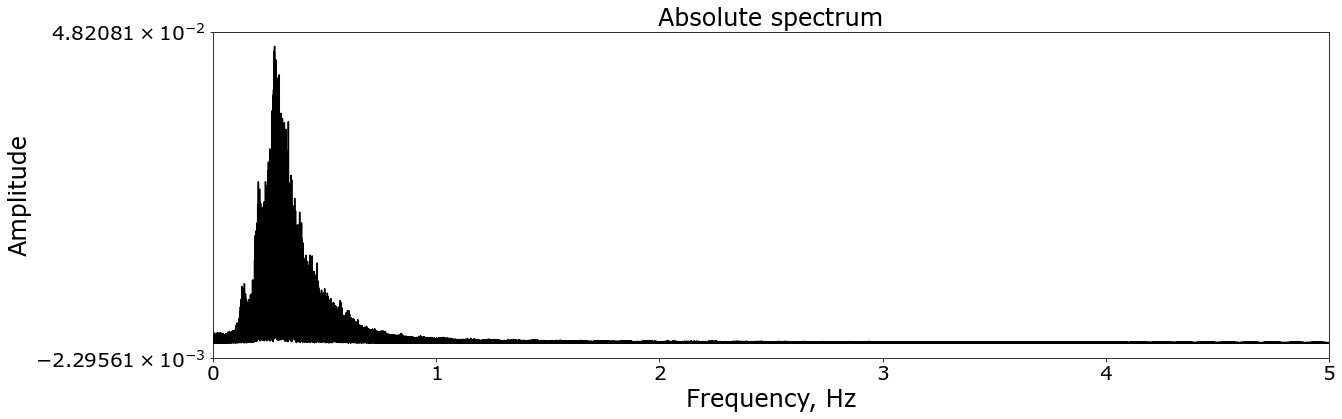

In [14]:
trace_reject_around = tools.reject_around(trace_tapered, lim = 3, number_sec = 5, dt = dt)
plot_process.plot_trace(trace_reject_around, t)
plot_process.plot_spectrum(trace_reject_around, dt)

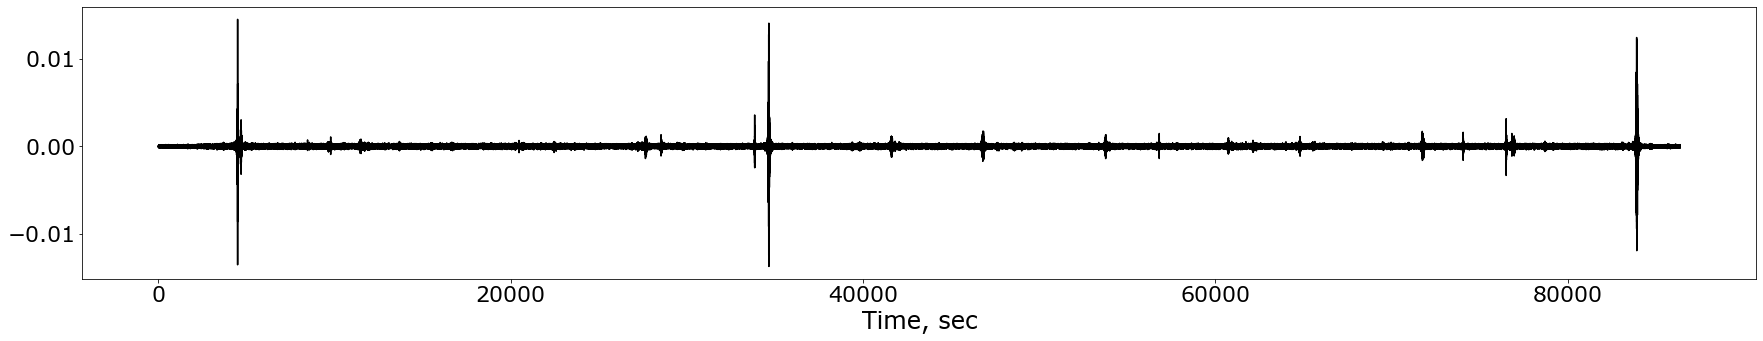

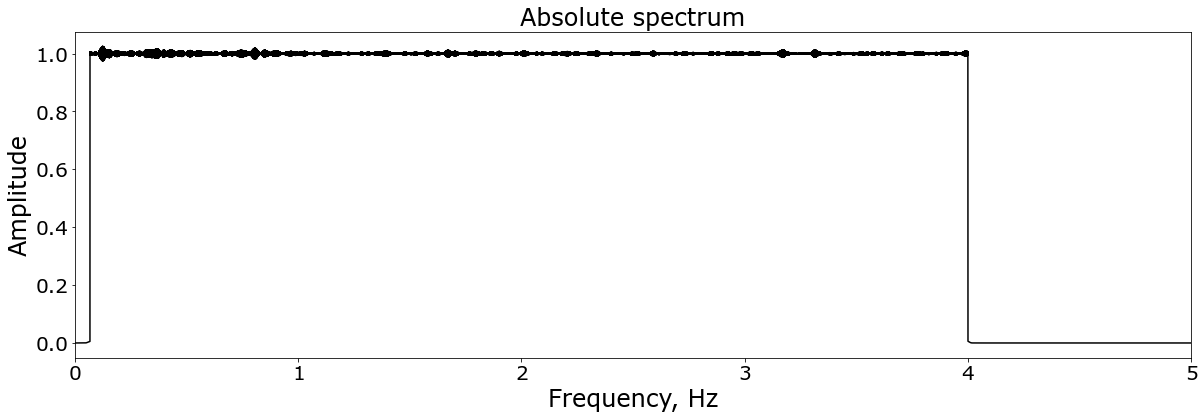

In [15]:
trace_whitening = tools.whitening(trace_tapered, dt, freqmin, freqmax, whiten_type = 'Cosine')
plot_process.plot_trace(trace_whitening, t)
plot_process.plot_spectrum(trace_whitening, dt, yscale = False)

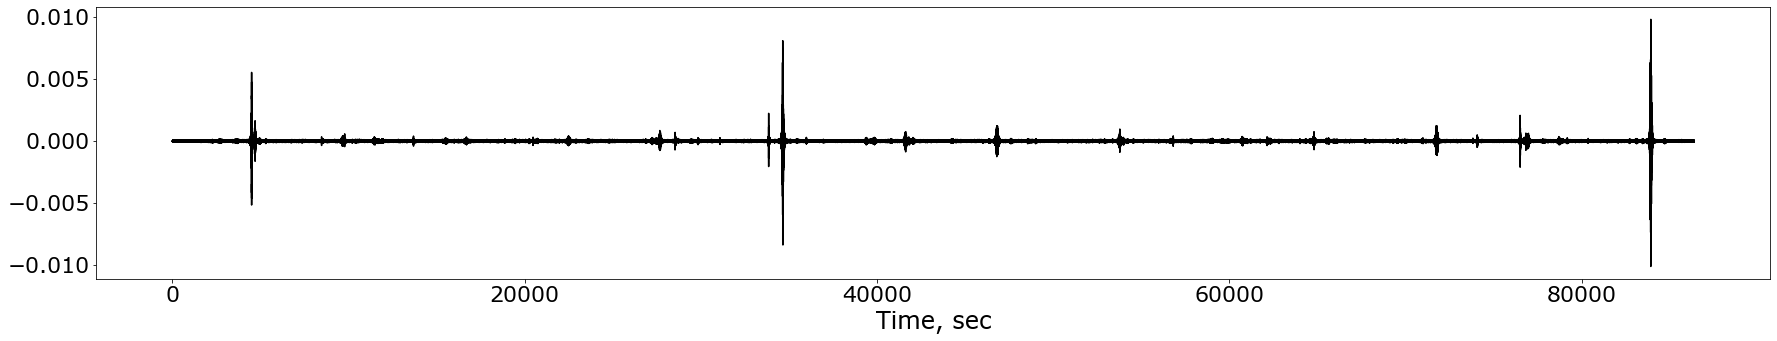

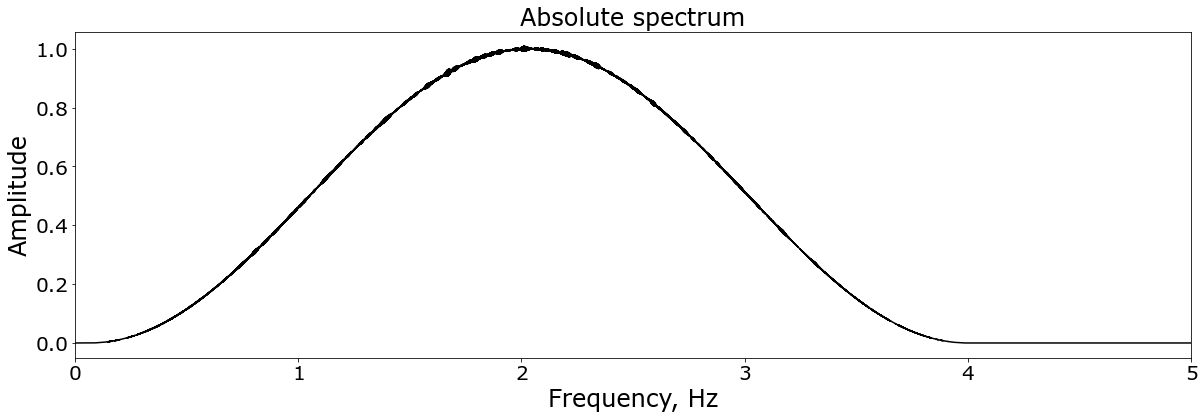

In [16]:
trace_whitening = tools.whitening(trace_tapered, dt, freqmin, freqmax, whiten_type = 'HANN')
plot_process.plot_trace(trace_whitening, t)
plot_process.plot_spectrum(trace_whitening, dt, yscale = False)

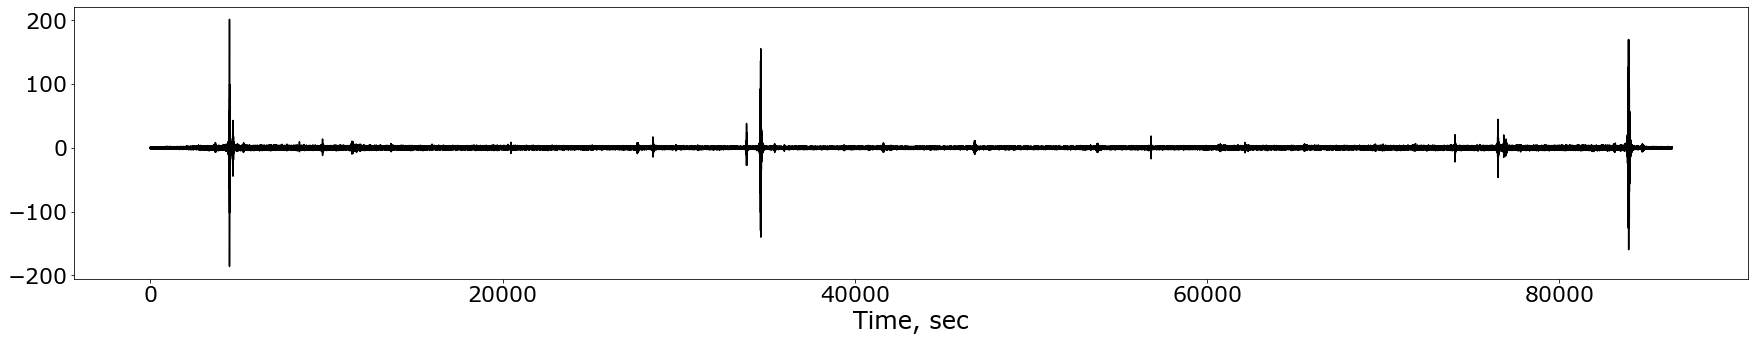

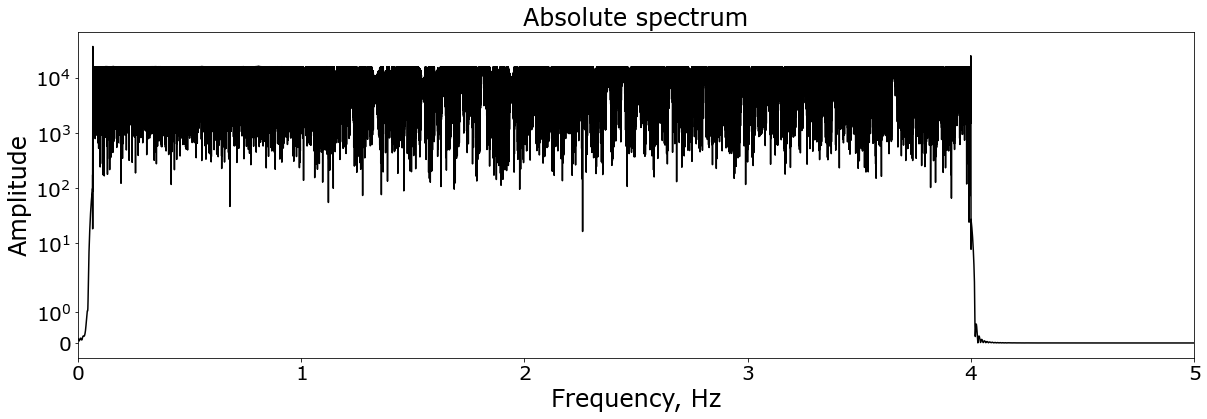

In [18]:
trace_whitening = tools.whitening(trace_tapered, dt, freqmin, freqmax, whiten_type = 'PSD')
plot_process.plot_trace(trace_whitening, t)
plot_process.plot_spectrum(trace_whitening, dt)

## Compute cross-correlation

In [19]:
import numpy as np
trace1 = 
trace2 = 
trace3 = 

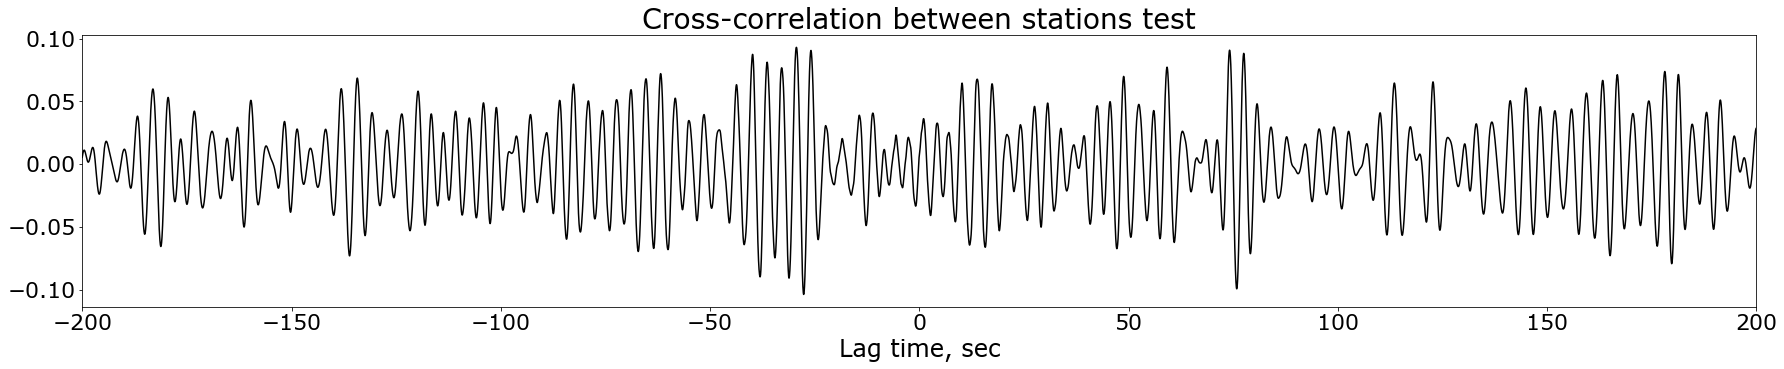

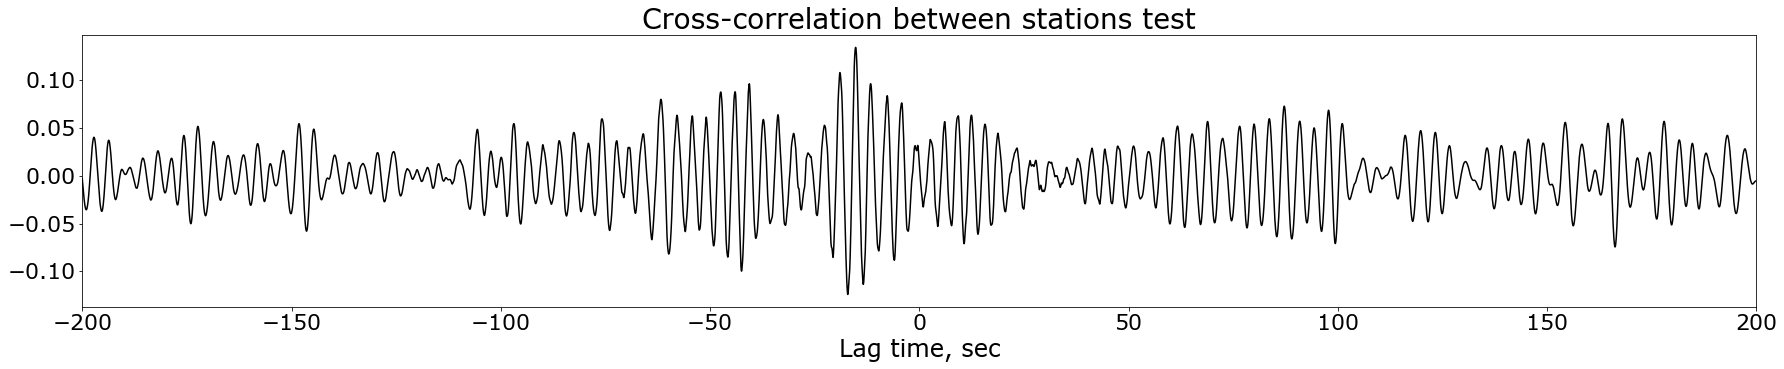

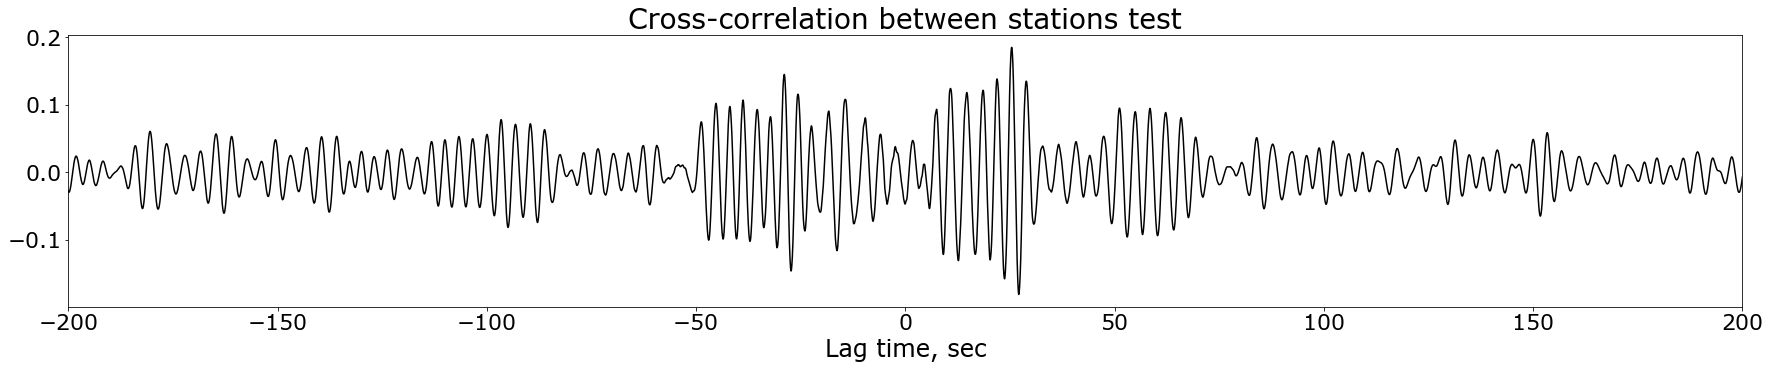

In [21]:
array_of_traces = [trace1, trace2, trace3]

array_comb = tools.make_combinations_of_traces(array_of_traces)

for i in range(len(array_comb)):
    corr = tools.compute_cross_corr(array_comb[i], 60*60, 60*30, fs=1/dt, len_save=500)
    t_corr = np.linspace(-500, 500, len(corr))
    plot_process.plot_cross_correlate(corr, t_corr, 'test')